# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [10]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [11]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [12]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

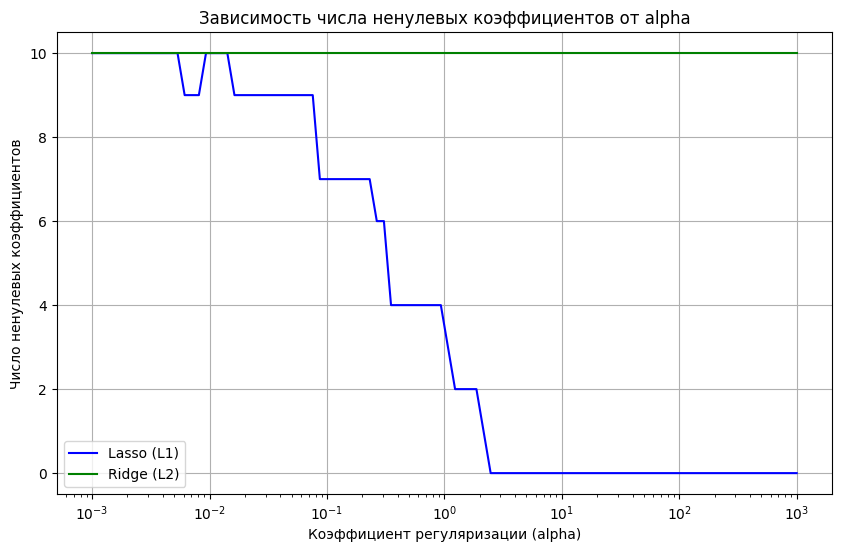

In [13]:
# Порог для определения близости коэффициента к нулю
threshold = 1e-3

# Логарифмическая сетка значений alpha
alphas = np.logspace(-3, 3, 100)

# Списки для хранения количества ненулевых коэффициентов
lasso_nonzero = []
ridge_nonzero = []

# Перебор значений alpha и подсчёт количества коэффициентов, не близких к нулю
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_nonzero.append(np.sum(np.abs(lasso.coef_) > threshold))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_nonzero.append(np.sum(np.abs(ridge.coef_) > threshold))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_nonzero, label='Lasso (L1)', color='blue')
plt.plot(alphas, ridge_nonzero, label='Ridge (L2)', color='green')
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('Число ненулевых коэффициентов')
plt.title('Зависимость числа ненулевых коэффициентов от alpha')
plt.legend()
plt.grid(True)
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [14]:
# from sklearn.cross_validation import cross_val_score
# from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# code here
ridge_default = Ridge()
ridge_default.fit(X_train, y_train)
y_pred = ridge_default.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")


TypeError: got an unexpected keyword argument 'squared'

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

In [ ]:
# code here

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [ ]:
# code here

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [ ]:
# code here

__Задание 3.__ Отчёт

**(2 балла)**

In [ ]:
# code here